In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.5)
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("C:\\Users\\arjun\\Desktop\\allprices\\crypto-markets.csv", parse_dates=["date"], index_col="date")
df.shape

(942297, 12)

In [3]:
df.head()

,slug,symbol,name,ranknow,open,high,low,close,volume,market,close_ratio,spread
date,,,,,,,,,,,,
2013-04-28,bitcoin,BTC,Bitcoin,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
2013-04-29,bitcoin,BTC,Bitcoin,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2013-04-30,bitcoin,BTC,Bitcoin,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
2013-05-01,bitcoin,BTC,Bitcoin,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
2013-05-02,bitcoin,BTC,Bitcoin,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


In [4]:
df = df[df.slug == "litecoin"][['open','high']]

In [5]:
df.shape

(2042, 2)

C:\Python\Python37-32\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price of Litecoin')

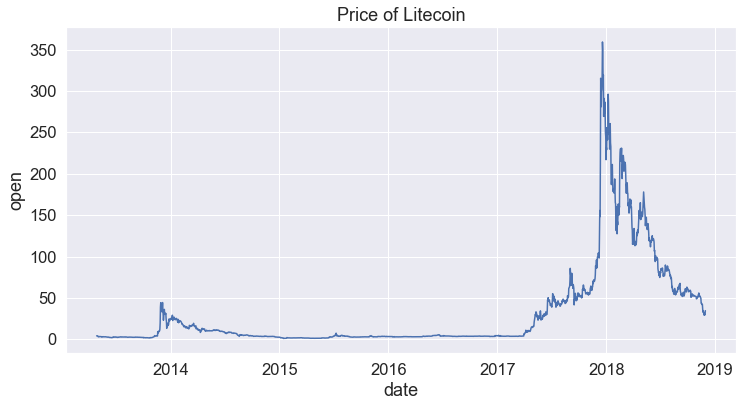

In [6]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df.index, y="open", data=df).set_title("Price of Litecoin")

Text(0.5, 0.9, 'Down-sampled to 10-day periods')

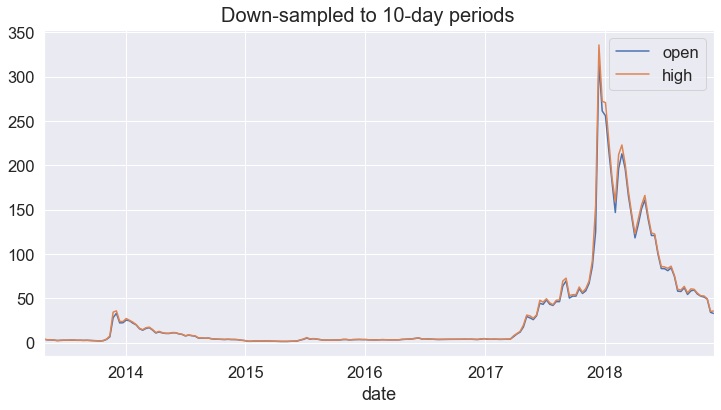

In [7]:
df.resample('10D').mean().plot(figsize=(12,6))
plt.figtext(.5,0.9,"Down-sampled to 10-day periods", fontsize=20, ha='center')

In [8]:

data = df.iloc[:, 0:2]
hist = []
target = []
length = 90
for i in range(len(data)-length):
    x = data[i:i+length]
    y = data.iloc[i+length,0]
    hist.append(x)
    target.append(y)




In [9]:
data=df.iloc[:,0:2]

In [10]:
input_data=data.values

In [11]:

data=df.iloc[:,0:2]
X=[]
y=[]
for i in range(len(data)-90-1):
    t=[]
    for j in range(0,90):
        t.append(input_data[[i+j],:])
    X.append(t)
    y.append(input_data[i+90,0])

In [12]:
X=np.array(X)
y=np.array(y)

In [33]:
print(X.shape)
print(input_data.shape)
print(y.shape)

(1951, 90, 2)
(2042, 2)
(1951,)


In [14]:
test_size=int(.3*len(input_data))
X_test=X[:test_size+90]
print(X_test.shape)

(702, 90, 1, 2)


In [36]:
x_train1=X[:1900]
y_train1=y[:1900]

In [37]:
x_test1=X[1900:]
y_test1=y[1900:]

In [38]:
len(input_data)*0.3

612.6

In [39]:
X=X.reshape(X.shape[0],90,2)

In [40]:
X_test=X_test.reshape(X_test.shape[0],90,2)
x_test1=x_test1.reshape(x_test1.shape[0],90,2)

In [41]:
print(X.shape)
print(X_test.shape)
print(type(X_test))
print("#############################")
#see this x_train1,x_test1
print(x_train1.shape)
print(x_test1.shape)

(1951, 90, 2)
(702, 90, 2)
<class 'numpy.ndarray'>
#############################
(1900, 90, 2)
(51, 90, 2)


In [48]:
x_test1
print(f"shape of y_test {y_test.shape}\nshape of y_test1 {y_test1.shape}")

shape of y_test (702, 1)
shape of y_test1 (51, 1)


In [47]:
y_test1=y_test1.reshape(-1,1)

In [21]:
y_test=X_test[:,0,0]
y_test=y_test.reshape(702,1)
#y_test=y_test.va


AttributeError: 'numpy.ndarray' object has no attribute 'va'

In [49]:

y_test.shape

(702, 1)

In [ ]:
mean_squared_error(pred,y_test)

In [ ]:
model = Sequential()
model.add(LSTM(units=30, return_sequences= True, input_shape=(X.shape[1],2)))
model.add(LSTM(units=30, return_sequences=True))
model.add(LSTM(units=30))
model.add(Dense(units=1))
model.summary()

In [ ]:
plt.plot(np.arange(1,703),pred)
plt.plot(np.arange(1,703),X_test[])

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [20]:

model.fit(X, y, epochs=30, batch_size=32)

Train on 1951 samples
Epoch 1/30
 864/1951 [============>.................] - ETA: 30s - loss: 3110.0035

KeyboardInterrupt: 

In [24]:
pred = model1.predict(X_test)


Text(0.5, 1.0, 'MultiVariate LiteCoin')

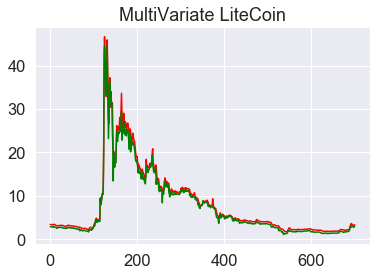

In [25]:
plt.plot(pred,color='red')
plt.plot(input_data[90:test_size+(180),0],color='green')
plt.title("MultiVariate LiteCoin")


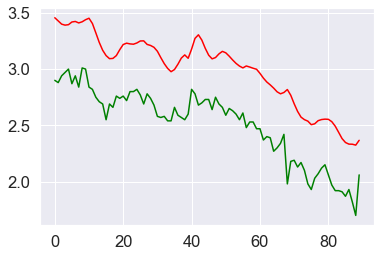

In [26]:
plt.plot(input_data[90:180,0],color='green')
plt.plot(pred[:90],color='red')

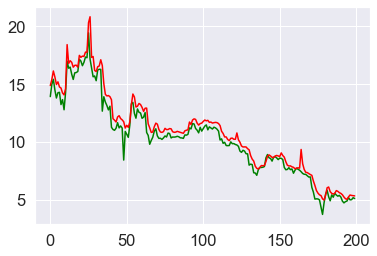

In [27]:
plt.plot(input_data[300:500,0],color='green')
plt.plot(pred[210:410],color='red')

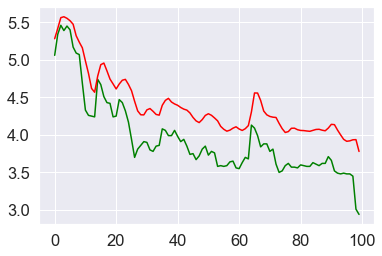

In [28]:
plt.plot(input_data[500:600,0],color='green')
plt.plot(pred[410:510],color='red')

In [29]:
#training further epochs

model.fit(X, y, epochs=30, batch_size=32)

Train on 1951 samples
Epoch 1/30
1280/1951 [==================>...........] - ETA: 5s - loss: 3590.0540

KeyboardInterrupt: 

In [ ]:
plt.plot(input_data[90:180,0],color='green')
plt.plot(pred[:90],color='red')

In [ ]:
plt.plot(input_data[300:500,0],color='green')
plt.plot(pred[210:410],color='red')

In [ ]:
model.save("C:\\Users\\arjun\\Desktop\\litecoin.h5",save_format='h5')

In [22]:
model1=tf.keras.models.load_model("C:\\Users\\arjun\\Desktop\\litecoin.h5")


In [23]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 90, 30)            3960      
_________________________________________________________________
lstm_1 (LSTM)                (None, 90, 30)            7320      
_________________________________________________________________
lstm_2 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 18,631
Trainable params: 18,631
Non-trainable params: 0
_________________________________________________________________


In [24]:
model1.predict(X_test)

array([[ 3.456056 ],
       [ 3.4278104],
       [ 3.3992627],
       [ 3.390382 ],
       [ 3.394451 ],
       [ 3.4182932],
       [ 3.423062 ],
       [ 3.409938 ],
       [ 3.420126 ],
       [ 3.4386199],
       [ 3.4517655],
       [ 3.4047797],
       [ 3.321642 ],
       [ 3.2370136],
       [ 3.1671152],
       [ 3.1197786],
       [ 3.0924685],
       [ 3.094826 ],
       [ 3.1199243],
       [ 3.1724617],
       [ 3.2181427],
       [ 3.2300868],
       [ 3.223772 ],
       [ 3.2209132],
       [ 3.2319586],
       [ 3.2496316],
       [ 3.2507458],
       [ 3.2190769],
       [ 3.2098398],
       [ 3.1934364],
       [ 3.1583252],
       [ 3.1019106],
       [ 3.0485716],
       [ 3.0058882],
       [ 2.9767458],
       [ 2.9961033],
       [ 3.0429215],
       [ 3.097652 ],
       [ 3.1258888],
       [ 3.0959241],
       [ 3.1773555],
       [ 3.2728548],
       [ 3.3043668],
       [ 3.2572265],
       [ 3.1843858],
       [ 3.1234527],
       [ 3.0908437],
       [ 3.10

In [ ]:
X_test[90]

In [ ]:
pred[0]

In [53]:
newmodel = Sequential()
newmodel.add(LSTM(units=30, return_sequences= True, input_shape=(X.shape[1],2)))
newmodel.add(LSTM(units=30, return_sequences=True))
newmodel.add(LSTM(units=30))
newmodel.add(Dense(units=1))
newmodel.summary()
newmodel.compile(optimizer='adam', loss='mean_squared_error')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 90, 30)            3960      
_________________________________________________________________
lstm_7 (LSTM)                (None, 90, 30)            7320      
_________________________________________________________________
lstm_8 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 18,631
Trainable params: 18,631
Non-trainable params: 0
_________________________________________________________________


In [55]:
newmodel.fit(x_train1,y_train1,epochs=30)

Train on 1900 samples
Epoch 1/30
1900/1900 [==============================] - 6s 3ms/sample - loss: 3627.89842s
Epoch 2/30
1900/1900 [==============================] - 6s 3ms/sample - loss: 3500.4792
Epoch 3/30
1900/1900 [==============================] - 6s 3ms/sample - loss: 3404.4929
Epoch 4/30
1900/1900 [==============================] - 6s 3ms/sample - loss: 3316.9735
Epoch 5/30
1900/1900 [==============================] - 7s 4ms/sample - loss: 3232.9996
Epoch 6/30
1900/1900 [==============================] - 6s 3ms/sample - loss: 3153.2085
Epoch 7/30
1900/1900 [==============================] - 6s 3ms/sample - loss: 3077.5294
Epoch 8/30
1900/1900 [==============================] - 6s 3ms/sample - loss: 3004.4205
Epoch 9/30
1900/1900 [==============================] - 6s 3ms/sample - loss: 2934.1172
Epoch 10/30
1900/1900 [==============================] - 6s 3ms/sample - loss: 2866.1607
Epoch 11/30
1900/1900 [==============================] - 6s 3ms/sample - loss: 2801.1711
Epoch 

In [56]:
prediction=newmodel.predict(x_test1)

In [60]:
mean_squared_error(prediction,y_test1)


37.81725598039735

In [61]:
newmodel.save("C:\\Users\\arjun\\Desktop\\litecoin_new.h5",save_format='h5')

In [64]:
model2=tf.keras.models.load_model("C:\\Users\\arjun\\Desktop\\litecoin_new.h5")


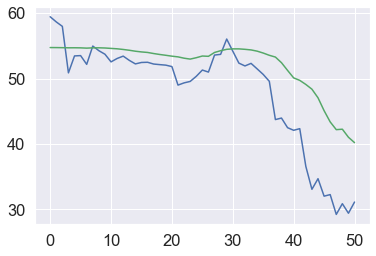

In [67]:
plt.plot(np.arange(51),y_test1)
plt.plot(np.arange(51),prediction,color='g')

In [69]:
model2.fit(x_train1,y_train1,epochs=30)

Train on 1900 samples
Epoch 1/30
1900/1900 [==============================] - 11s 6ms/sample - loss: 1813.8928
Epoch 2/30
1900/1900 [==============================] - 11s 6ms/sample - loss: 1779.0690
Epoch 3/30
1900/1900 [==============================] - 11s 6ms/sample - loss: 1744.6464
Epoch 4/30
1900/1900 [==============================] - 11s 6ms/sample - loss: 1711.8804
Epoch 5/30
1900/1900 [==============================] - 11s 6ms/sample - loss: 1679.6562
Epoch 6/30
1900/1900 [==============================] - 11s 6ms/sample - loss: 1647.7795
Epoch 7/30
1900/1900 [==============================] - 11s 6ms/sample - loss: 1616.5768
Epoch 8/30
1900/1900 [==============================] - 11s 6ms/sample - loss: 1588.2822
Epoch 9/30
1900/1900 [==============================] - 11s 6ms/sample - loss: 1556.2535
Epoch 10/30
1900/1900 [==============================] - 6s 3ms/sample - loss: 1526.7372
Epoch 11/30
1900/1900 [==============================] - 5s 3ms/sample - loss: 1498.4625

In [71]:
prediction_after_60_epochs=model2.predict(x_test1)

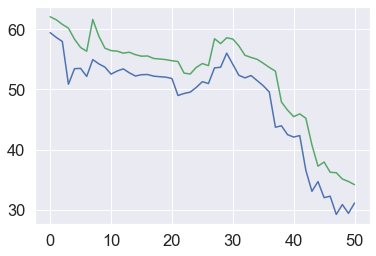

In [72]:
plt.plot(np.arange(51),y_test1)
plt.plot(np.arange(51),prediction_after_60_epochs,color='g')

In [75]:
newmodel.compile(optimizer='adam', loss='mean_squared_error')
history=newmodel.fit(x_train1,y_train1,validation_split=0.2,epochs=30)

Train on 1520 samples, validate on 380 samples
Epoch 1/30
1520/1520 [==============================] - 9s 6ms/sample - loss: 4.0256 - val_loss: 9155.8975
Epoch 2/30
1520/1520 [==============================] - 4s 3ms/sample - loss: 3.5500 - val_loss: 9081.0862
Epoch 3/30
1520/1520 [==============================] - 4s 3ms/sample - loss: 3.6915 - val_loss: 9003.7062
Epoch 4/30
1520/1520 [==============================] - 4s 3ms/sample - loss: 3.3159 - val_loss: 8937.8074
Epoch 5/30
1520/1520 [==============================] - 4s 3ms/sample - loss: 3.1469 - val_loss: 8862.0824
Epoch 6/30
1520/1520 [==============================] - 4s 3ms/sample - loss: 3.0377 - val_loss: 8800.3494
Epoch 7/30
1520/1520 [==============================] - 4s 3ms/sample - loss: 2.9943 - val_loss: 8737.4072
Epoch 8/30
1520/1520 [==============================] - 4s 3ms/sample - loss: 2.7318 - val_loss: 8715.9519
Epoch 9/30
1520/1520 [==============================] - 4s 3ms/sample - loss: 3.4008 - val_loss: 

In [76]:
prediction_newmodel=newmodel.predict(x_test1)

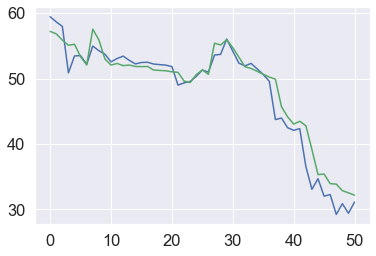

In [77]:
plt.plot(np.arange(51),y_test1)
plt.plot(np.arange(51),prediction_newmodel,color='g')

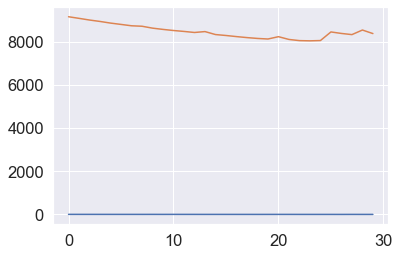

In [79]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
model_with_dropouts=